In [51]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

# Function to parse XML and extract information
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    author = root.find('author').text
    main_text = root.find('mainText').text
    orientation = root.find('orientation').text
    title = root.find('title').text
    uri = root.find('uri').text
    veracity = root.find('veracity').text

    # Extract portal data
    portal = root.find('portal').text

    return {
        'author': author,
        'mainText': main_text,
        'orientation': orientation,
        'title': title,
        'veracity': veracity,
        'portal': portal
    }

# List to store data
data_list = []

# Directory containing XML files
xml_directory = 'Files'

# Loop through each XML file
for xml_file in range(1627):
    file_name = f"{xml_file:04d}.xml"
    file_path = os.path.join(xml_directory, file_name)
    
    if os.path.isfile(file_path):
        data = parse_xml(file_path)
        data_list.append(data)

# Create a DataFrame
df = pd.DataFrame(data_list)

# Save DataFrame to CSV
df.to_csv('output.csv', index=False)


## <span style="color:blue"> 2. Implementation </span>

### <span style="color:blue">2.1 Pre-Processing </span>

In [48]:
# Install Plotly - library for interactive visualizations.
!pip install plotly

# Install NLTK a library for natural language processing tasks such as tokenization, stemming.
!pip install nltk

# Install XGBoost - optimized gradient boosting library designed for efficiency and performance.
!pip install xgboost

# Install NumPy -library for numerical computing in Python.
!pip install numpy

# Install NumPy -library for numerical computing in Python.
!pip install tokenization

import plotly  # Import the Plotly library.

import plotly.graph_objects as go  # Import the graph_objects module from Plotly, used for creating specific plot types.

import nltk  # Import the NLTK library for natural language processing.

import xgboost as xgb  # Import XGBoost, a gradient boosting library.

import gc  # Import garbage collector module for managing memory.

import re  # Import regular expression module for text processing.

import string  # Import string module for string manipulation and text operations.

import operator  # Import operator module for performing operations.

from collections import defaultdict  # Import defaultdict from collections to create dictionaries with default values.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # Import WordCloud and related modules for word cloud visualization.

import numpy as np  # Import NumPy for numerical computing and array operations.

import pandas as pd  # Import pandas for data manipulation and analysis.

import matplotlib.pyplot as plt  # Import matplotlib for data visualization.

import seaborn as sns  # Import seaborn for statistical data visualization.

import tokenization  # import Tokenization library

from wordcloud import STOPWORDS  # Import STOPWORDS from WordCloud for additional stopwords.

from sklearn import metrics  # Import metrics from scikit-learn for evaluating model performance.

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit  # Import classes for stratified cross-validation.

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix  # Import specific metrics for evaluating classification models.

from sklearn.naive_bayes import MultinomialNB  # Import the Multinomial Naive Bayes classifier.

from sklearn.ensemble import GradientBoostingClassifier  # Import the Gradient Boosting classifier.

from sklearn.pipeline import Pipeline  # Import Pipeline from scikit-learn for creating a data processing pipeline.

from sklearn.feature_extraction.text import TfidfTransformer  # Import TfidfTransformer for text feature extraction.

from sklearn.model_selection import cross_val_score  # Import cross_val_score for cross-validation.

from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest classifier.

from sklearn import feature_extraction, linear_model, model_selection, preprocessing 

from sklearn.feature_extraction.text import CountVectorizer # import CounVectorizer, a text feature extraction method

nltk.download('stopwords')  # Download the stopwords dataset from NLTK.

from nltk.corpus import stopwords  # Import stopwords from NLTK for text preprocessing.

[nltk_data] Downloading package stopwords to C:\Users\Veronica
[nltk_data]     Torrens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Will use the train_test_split function from the scikit-learn library to easily split your CSV file into training and test sets. In the provided code below, the randomness of the split is controlled by the random_state parameter in the train_test_split function.

In [154]:
from sklearn.model_selection import train_test_split

# Load CSV file
file_path = 'output2.csv'
df = pd.read_csv(file_path)

# Split data
test_size = 0.2  # 20% of the data will be used for testing
random_state = 50  # Set a random state for reproducibility

train_data, test_data = train_test_split(df, test_size=test_size, random_state=random_state)

# Save the split data
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


Read the files"train_data.csv" and "Test_data.csv", into two separate pandas DataFrames named train_df and test_df: 

In [155]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

Print the shape (number of rows and columns) and memory usage (in MB) of training and test DataFrames:

In [156]:
print('Training Data Shape = {}'.format(train_data.shape))
print('Training Data Memory Usage = {:.2f} MB'.format(train_data.memory_usage().sum() / 1024**2))
print('Test Data Shape = {}'.format(test_data.shape))
print('Test Data Memory Usage = {:.2f} MB'.format(test_data.memory_usage().sum() / 1024**2))

Training Data Shape = (1272, 7)
Training Data Memory Usage = 0.08 MB
Test Data Shape = (319, 7)
Test Data Memory Usage = 0.02 MB


Prints the data types of the columns in the train_data and test_data DataFrames

In [157]:
data_train = train_data.dtypes
data_test = test_data.dtypes

print("Training Data")
print(data_train)
print("Testing Data")
print(data_test)

Training Data
author         object
mainText       object
orientation    object
title          object
veracity       object
portal         object
Target          int64
dtype: object
Testing Data
author         object
mainText       object
orientation    object
title          object
veracity       object
portal         object
Target          int64
dtype: object


In [158]:
train_data.head()

,author,mainText,orientation,title,veracity,portal,Target
337,"By Tal Kopan and Manu Raju, CNN",Washington (CNN)A brewing civil war within the...,mainstream,Hill Republicans frustrated with GOP disunity ...,mostly true,cnn,1
1494,Jonathan Constante,A Ukraine policewoman is dead after contractin...,right,Cop Dies From Tuberculosis After Suspect Spat ...,mostly true,right-wing-news,1
1355,Tiffiny Ruegner,Now we find out that not only is Ahmad Rahami ...,right,New York bomb Suspect SUED Police!,mostly false,right-wing-news,0
153,Posted by Jenna LeFever on 21 Sep 2016,Police protected and served the hell out of a ...,left,NaN,mostly true,addicting-info,1
1091,NaN,Donald Trump’s presidential campaign has paid ...,mainstream,Trump's campaign paid his businesses $8.2 million,mostly true,politico,1


In [159]:
test_data.head()

,author,mainText,orientation,title,veracity,portal,Target
643,Allen West,The document has moved here.,right,Moved Permanently,mostly true,eagle-rising,1
1002,NaN,Gov. Chris Christie has the third-worst approv...,mainstream,New Jersey Christie among the most unpopular g...,mostly true,politico,1
770,Amber,"Weirdest thing, United States Immigration made...",right,800 Immigrants Set To Be Deported For National...,mostly true,freedom-daily,1
48,Candace Smith Adam Kelsey,Less than a day after protests over the police...,mainstream,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",mostly true,abc,1
820,Blair Patterson,Judge Jeanine Pirro has been all over Hillary ...,right,Judge Jeanine Pirro Destroys Any Chance Hillar...,mostly true,freedom-daily,1


In [160]:
# Drop rows with missing values in 'mainText', 'orientation', 'title', 'veracity'
train_df = train_df.dropna(subset=['mainText', 'orientation', 'title', 'veracity'])
test_df = test_df.dropna(subset=['mainText', 'orientation', 'title', 'veracity'])


In [161]:
#Shape of new data without na in the rows
print('Training Data Shape = {}'.format(train_df.shape))
print('Training Data Memory Usage = {:.2f} MB'.format(train_data.memory_usage().sum() / 1024**2))
print('Test Data Shape = {}'.format(test_df.shape))
print('Test Data Memory Usage = {:.2f} MB'.format(test_data.memory_usage().sum() / 1024**2))

Training Data Shape = (1263, 7)
Training Data Memory Usage = 0.08 MB
Test Data Shape = (314, 7)
Test Data Memory Usage = 0.02 MB


In [162]:
#Add a new column named 'article_len' to the train_df DataFrame. 
#It calculates the number of words in each mainText column and stores the word count in the 'article_len' column 
#for each corresponding article. The lambda x: len(x.split(' ')) function is used to split each article's text into words 
#and then calculates the length (number of words) in that text.
#(from https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/)
train_df['artcicle_len'] = train_df['mainText'].apply(lambda x: len(x.split(' ')))

#displays the first few rows of the modified train_df 
train_df.head()

,author,mainText,orientation,title,veracity,portal,Target,artcicle_len
0,"By Tal Kopan and Manu Raju, CNN",Washington (CNN)A brewing civil war within the...,mainstream,Hill Republicans frustrated with GOP disunity ...,mostly true,cnn,1,658
1,Jonathan Constante,A Ukraine policewoman is dead after contractin...,right,Cop Dies From Tuberculosis After Suspect Spat ...,mostly true,right-wing-news,1,275
2,Tiffiny Ruegner,Now we find out that not only is Ahmad Rahami ...,right,New York bomb Suspect SUED Police!,mostly false,right-wing-news,0,348
4,NaN,Donald Trump’s presidential campaign has paid ...,mainstream,Trump's campaign paid his businesses $8.2 million,mostly true,politico,1,1149
5,Jeff Dunetz,"“We love you, buddy, but what are you here for...",right,MSNBC Destroys Hillary’s Campaign Manager Robb...,mostly true,eagle-rising,1,343


In [163]:
#Calculate the count of each target class in the DataFrame train_df and test_df and store the results in the data_counts_train and data_counts_test arrays.
# from https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.value_counts.html

data_counts_train = train_df.groupby('Target')['Target'].agg('count').values
data_counts_train



array([277, 986], dtype=int64)

In [164]:
data_counts_test = test_df.groupby('Target')['Target'].agg('count').values
data_counts_test

array([ 70, 244], dtype=int64)

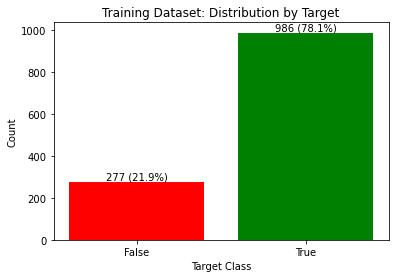

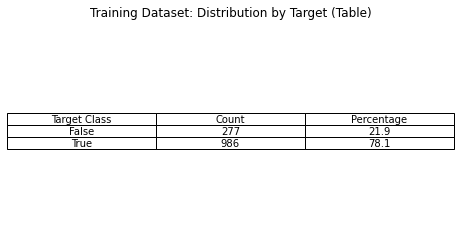

In [167]:
# Define the labels for the target classes
target_labels = ['False', 'True']

# Calculate the total number of data points
total_data_points = sum(data_counts_train)

# Calculate the percentages for each target class and round to one decimal place
percentages = [round((count / total_data_points) * 100, 1) for count in data_counts_train]

# Create the bar chart
plt.bar(target_labels, data_counts_train, color=['red', 'green'])

# Add labels and percentages to the bars
for i, (count, percentage) in enumerate(zip(data_counts_train, percentages)):
    plt.text(i, count, f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

# Set axis labels and title for the bar chart
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Training Dataset: Distribution by Target')

# Show the bar chart
plt.show()

# Create a DataFrame with the target labels, counts, and rounded percentages
data_table = pd.DataFrame({'Target Class': target_labels, 'Count': data_counts_train, 'Percentage': percentages})

# Display the data in a table
plt.figure(figsize=(8, 4))
plt.axis('off')  # Turn off axis for the table
plt.table(cellText=data_table.values, colLabels=data_table.columns, cellLoc='center', loc='center')
plt.title('Training Dataset: Distribution by Target (Table)')
plt.show()


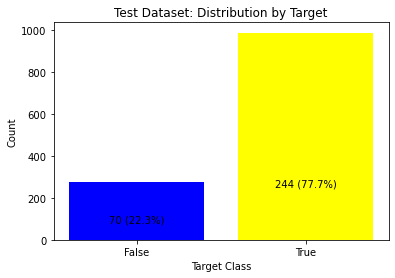

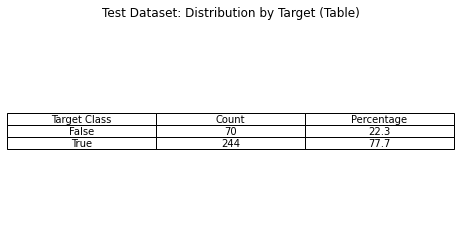

In [100]:
# Define the labels for the target classes
target_labels = ['False', 'True']

# Calculate the total number of data points
total_data_points = sum(data_counts_test)

# Calculate the percentages for each target class and round to one decimal place
percentages = [round((count / total_data_points) * 100, 1) for count in data_counts_test]

# Create the bar chart
plt.bar(target_labels, data_counts_train, color=['blue', 'yellow'])

# Add labels and percentages to the bars
for i, (count, percentage) in enumerate(zip(data_counts_test, percentages)):
    plt.text(i, count, f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

# Set axis labels and title for the bar chart
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Test Dataset: Distribution by Target')

# Show the bar chart
plt.show()

# Create a DataFrame with the target labels, counts, and rounded percentages
data_table = pd.DataFrame({'Target Class': target_labels, 'Count': data_counts_test, 'Percentage': percentages})

# Display the data in a table
plt.figure(figsize=(8, 4))
plt.axis('off')  # Turn off axis for the table
plt.table(cellText=data_table.values, colLabels=data_table.columns, cellLoc='center', loc='center')
plt.title('Test Dataset: Distribution by Target (Table)')
plt.show()

Both for training and test datasets I immediately observe that the dataset is imbalanced, as there is a significant difference in the number of data points between the two target classes. Imbalanced datasets are a problem for my model, as it may lead to biased prediction.

Addressing the class imbalance is fundamental to develop a robust model. Techniques such as resampling, using different evaluation metrics (e.g., F1-score instead of accuracy) may help with resolving the issue.

To further understand the dataset, I will proceed to visualize some of the records both for both "True" and "False" news

In [168]:
# selects and prints three examples of news labeled as "False"(target = 0) from the DataFrame train_df.
example1 = train_df[train_df["Target"] == 0]["mainText"].values[3]
example2 = train_df[train_df["Target"] == 0]["mainText"].values[4]
example3 = train_df[train_df["Target"] == 0]["mainText"].values[5]

print("Examples of False News")
print("Example 1:", example1)
print("Example 2:", example2)
print("Example 3:", example3)


Examples of False News
Example 1: Another day in “Obama’s America”… another RIOT. This kind of crap is becoming our norm, and it’s not right. This time…Police shoot ARMED man who is deemed a threat by his actions, and the BlackLivesMatter crowd goes WILD! …but I mean really wild. Like, savage. They have entered their rioting mode again. His parents are telling everyone it wasn’t a weapon in his hand, it was a book. A book ladies and gentlemen. What’s that smell? Oh…nasty. It’s bullcrap. SO…there is a fatal police shooting and now, the Police are under full attack, reporters are getting rocks thrown at their head, innocent bystanders’ are getting their vehicles bashed up and set on fire….and yes, stores are being looted. Free ipads and laptops for EVERYONE! Because they are grieving that someone has died, the country is against them and stealing stuff they wanted but never could get…makes it all better right? Imbeciles. This is no stand they are taking at all. No..this? This is what ‘st

In [169]:
# selects and prints three examples of news labeled as "False"(target = 0) from the DataFrame train_df.
example1 = train_df[train_df["Target"] == 1]["mainText"].values[3]
example2 = train_df[train_df["Target"] == 1]["mainText"].values[4]
example3 = train_df[train_df["Target"] == 1]["mainText"].values[5]

print("Examples of True News")
print("Example 1:", example1)
print("Example 2:", example2)
print("Example 3:", example3)

Examples of True News
Example 1: “We love you, buddy, but what are you here for, if you can’t answer basic questions?” Clinton campaign manager Robby Mook, was destroyed on Morning Joe Wednesday morning because he tried to tap-dance around the most basic questions about his candidate’s stands on issues. Things started to go downhill about two and a half minutes into the interview when Willie Geist asked Mook if Clinton had regrets about the way Syria was handled. Completely ignoring the question, Mook’s response was that Hillary left the State Dept. with a 70% approval rating. GEIST: What’s her biggest regret about the way Syria’s been handled? MOOK: Well, obviously, she’s been out of office for some time now. GEIST: But she was there when it started. MOOK: Well, right, but, but, uh, you know, she, I, I think she’s well regarded for her leadership as secretary of state. She came out of that office with a 70 percent approval rating. In contrast to Donald Trump, she has released a clear 

I will now proceed to follow a series of steps to pre-process the data below. I have tried to comment each step to show what i am doing!

In general, I will be cleaning the text by removing URLs, emojis, HTML tags, punctuation, and words containing numbers. I will also be converting the text to lowercase and applying stemming to reduce words to their root form. Finally, I am removing stopwords to filter out common words that usually don't contribute much to the meaning of the text.

In [170]:
# Define functions for text cleaning
#Please note some of this code was taken from 
#https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#9.-NLP:-Disaster-Tweets
#I organized the code and also commented it more clearly which made me understand it myself better

def remove_url(mainText):
    # Remove URLs from the text
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', mainText)

def remove_emoji(mainText):
    # Remove emojis from the text
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', mainText)

def remove_html(mainText):
    # Remove HTML tags from the text
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', mainText)

def clean_mainText(mainText):
    # Make text lowercase
    mainText = str(mainText).lower()
    
    # Remove text in square brackets
    mainText = re.sub('\[.*?\]', '', mainText)
    
    # Remove URLs
    mainText = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', mainText)
    mainText = re.sub('https?://\S+|www\.\S+', '', mainText)
    
    # Remove HTML tags
    mainText = re.sub('<.*?>+', '', mainText)
    
    # Remove punctuation
    mainText = re.sub('[%s]' % re.escape(string.punctuation), '', mainText)
    
    # Remove newline characters
    mainText = re.sub('\n', '', mainText)
    
    # Remove words containing numbers
    mainText = re.sub('\w*\d\w*', '', mainText)
    
    # Remove URLs, emojis, and HTML using the previously defined functions
    mainText = remove_url(mainText)
    mainText = remove_emoji(mainText)
    mainText = remove_html(mainText)
    
    return mainText

# Set up stopwords and stemming
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords
stemmer = nltk.SnowballStemmer("english")

# Function to preprocess text data
def preprocess_data(mainText):
    # Clean punctuation, URLs, and other unwanted elements
    mainText = clean_mainText(mainText)
    
    # Split the text into individual words and apply stemming to each word if it is not a stop word
    mainText = ' '.join(stemmer.stem(word) for word in mainText.split(' ') if word not in stop_words)

    return mainText


In [171]:
#Please note some of this code was taken from 
#https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#9.-NLP:-Disaster-Tweets
#I organized the code and also commented it more clearly which made me understand it myself better

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

stemmer = nltk.SnowballStemmer("english")

def preprocess_data(mainText):
    # Clean puntuation, urls, and so on
    mainText = clean_mainText(mainText)
    # Remove stopwords and Stemm all the words in the sentence
    mainText = ' '.join(stemmer.stem(word) for word in mainText.split(' ') if word not in stop_words)

    return mainText

The code below now applies the function preprocess_data to the 'mainText' column of both the test_df and train_df DataFrames. The function preprocess_data performs various text preprocessing steps that I had defined above, including cleaning the text by removing URLs, emojis, HTML tags, punctuation, and words containing numbers. It also converts the text to lowercase and removes stopwords while stemming the remaining words. The result of these preprocessing steps is stored in a new column called 'clean_mainText' for both DataFrames. 

The train_df.head() function is then used to display the first few rows of the train_df DataFrame, including the new 'clean_mainText' column.

In [172]:
# Preprocessing the 'text' column in the test_df DataFrame by applying the preprocess_data function to each entry.
test_df['clean_mainText'] = test_df['mainText'].apply(preprocess_data)

# Preprocessing the 'text' column in the train_df DataFrame by applying the preprocess_data function to each entry.
train_df['clean_mainText'] = train_df['mainText'].apply(preprocess_data)

# Displaying the first few rows of the train_df DataFrame, including the newly added 'clean_mainText' column.
train_df.head()

,author,mainText,orientation,title,veracity,portal,Target,artcicle_len,clean_mainText
0,"By Tal Kopan and Manu Raju, CNN",Washington (CNN)A brewing civil war within the...,mainstream,Hill Republicans frustrated with GOP disunity ...,mostly true,cnn,1,658,washington cnna brew civil war within gop hous...
1,Jonathan Constante,A Ukraine policewoman is dead after contractin...,right,Cop Dies From Tuberculosis After Suspect Spat ...,mostly true,right-wing-news,1,275,ukrain policewoman dead contract tuberculosi s...
2,Tiffiny Ruegner,Now we find out that not only is Ahmad Rahami ...,right,New York bomb Suspect SUED Police!,mostly false,right-wing-news,0,348,find ahmad rahami terrorist murder he entitl w...
4,NaN,Donald Trump’s presidential campaign has paid ...,mainstream,Trump's campaign paid his businesses $8.2 million,mostly true,politico,1,1149,donald trump presidenti campaign paid famili b...
5,Jeff Dunetz,"“We love you, buddy, but what are you here for...",right,MSNBC Destroys Hillary’s Campaign Manager Robb...,mostly true,eagle-rising,1,343,“we love buddi can't answer basic questions” c...


In [174]:
# Displaying the first few rows of the test_df DataFrame, including the newly added 'clean_mainText' column.
test_df.head()

,author,mainText,orientation,title,veracity,portal,Target,clean_mainText
0,Allen West,The document has moved here.,right,Moved Permanently,mostly true,eagle-rising,1,document move
1,NaN,Gov. Chris Christie has the third-worst approv...,mainstream,New Jersey Christie among the most unpopular g...,mostly true,politico,1,gov chris christi thirdworst approv rate gover...
2,Amber,"Weirdest thing, United States Immigration made...",right,800 Immigrants Set To Be Deported For National...,mostly true,freedom-daily,1,weirdest thing unit state immigr made mistak k...
3,Candace Smith Adam Kelsey,Less than a day after protests over the police...,mainstream,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",mostly true,abc,1,less day protest polic kill africanamerican ma...
4,Blair Patterson,Judge Jeanine Pirro has been all over Hillary ...,right,Judge Jeanine Pirro Destroys Any Chance Hillar...,mostly true,freedom-daily,1,judg jeanin pirro hillari clinton lack truth e...


By preprocessing the text data, I have reduced noise, removed unnecessary information, and represented words in their base form (stemming). The 'clean_mainText' column now contains a more concise and meaningful representation of the news, which can now be used for further analysis and as input to machine learning models for the task at hand: news true vs false classification.

Now that I have the clean_mainText column, I will create a function that creates a corpus (a collection of words) from the 'clean_mainText' column of the DataFrame for a specific target value (1 or 0) passed as an argument.

 

In [175]:
#Function to create corpus (a collection of words) 
def create_corpus_df(news, Target):
    corpus = []  # Initialize an empty list to store the words in the corpus.

    # Iterate through the 'clean_text' column for rows with the specified target value.
    for x in news[news['Target'] == Target]['clean_mainText'].str.split():
        # Split each 'clean_mainText' entry into individual words and add them to the corpus list.
        for i in x:
            corpus.append(i)
    
    return corpus  # Return the final corpus containing all words for the specified target.


With the above function ready, I can create word clouds associated with the two target values in the training dataset: 

The code below calculates the top 10 most frequent words in the corpus of news labeled as "True" in the training DataFrame. These words are likely to be the most relevant and indicative of true news content in the dataset. The resulting top variable will contain a list of tuples, where each tuple contains a word and its corresponding frequency.

In [180]:
# True News Cloud
# Creating the corpus for news labeled as "True" (target == 1) from the training DataFrame.
corpus_true_news = create_corpus_df(train_df, 1)

# Initialize an empty defaultdict to count the occurrences of each word in the corpus.
dic = defaultdict(int)

# Loop through each word in the corpus and count its occurrences.
for word in corpus_true_news:
    dic[word] += 1

# Sort the words based on their frequency in descending order (highest frequency first).
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
top
# The 'top' variable now contains the top 10 most frequent words and their corresponding frequencies in the corpus.

[('trump', 5622),
 ('said', 3722),
 ('clinton', 3344),
 ('would', 1580),
 ('debat', 1477),
 ('campaign', 1474),
 ('state', 1457),
 ('say', 1367),
 ('peopl', 1349),
 ('new', 1309)]

This code will create a bar chart with the top 10 words and their corresponding frequencies displayed on the y-axis. The x-axis will show the words: 

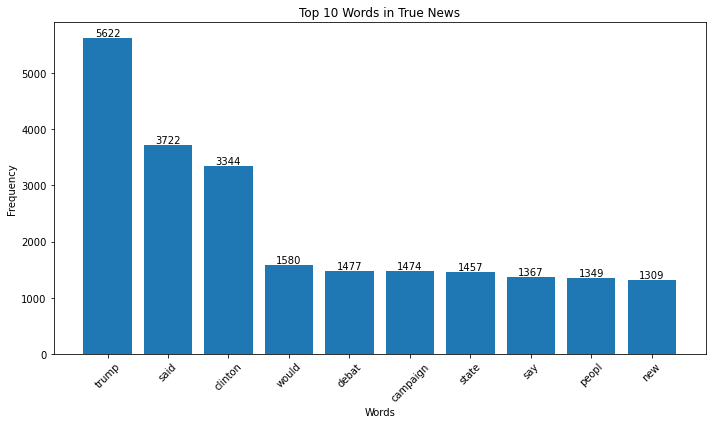

In [181]:
# Extract the top 10 words and their frequencies from the 'top' variable.
top_words = [word[0] for word in top]
frequencies = [freq[1] for freq in top]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size for better visibility.
plt.bar(top_words, frequencies)

# Add labels to the bars
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

# Set axis labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in True News')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability.
plt.tight_layout()  # Optional: Adjust the layout for better spacing.
plt.show()

Below I generate a word cloud visualization for newws labeled as "True" in the DataFrame train_df. The WordCloud object wc is created with specific parameters, such as the background color, maximum number of words to display. The word cloud is generated using the generate() method, which takes the cleaned text of news with "True"  as label: 

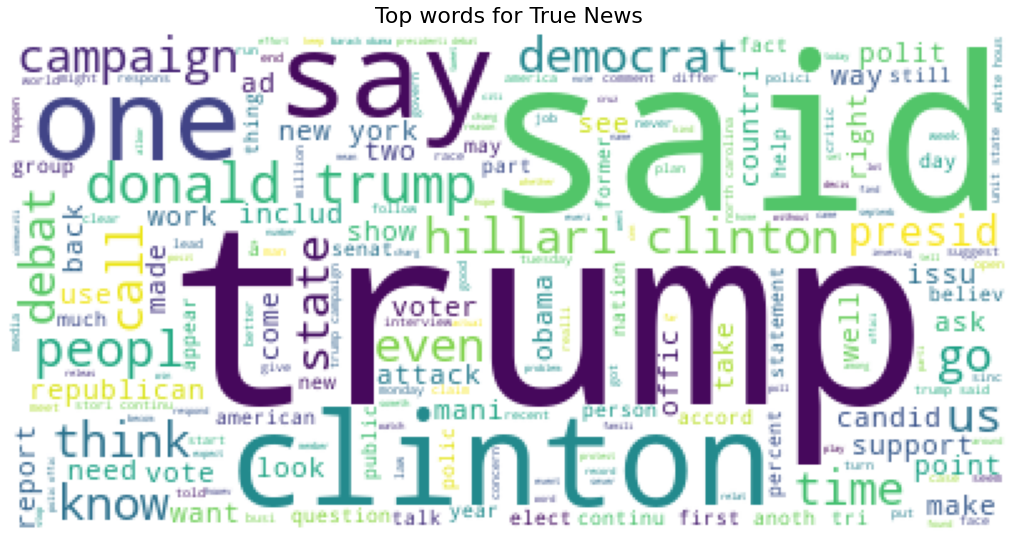

In [182]:
# Create a WordCloud object with specified parameters
wc = WordCloud(
    background_color='white',  # Set the background color to white
    max_words=200,             # Display a maximum of 200 words in the word cloud
)


# Create a word cloud for news = true
wc.generate(' '.join(mainText for mainText in train_df.loc[train_df['Target'] == 1, 'clean_mainText']))

# Set up the plot to display the word cloud
plt.figure(figsize=(18, 10))  # Set the size of the figure for the word cloud visualization
plt.title('Top words for True News', fontdict={'size': 22, 'verticalalignment': 'bottom'})  # Set the title for the word cloud

# Display the word cloud image
plt.imshow(wc)

# Turn off the axis labels and ticks to remove the axes' border around the word cloud
plt.axis("off")

# Show the word cloud visualization
plt.show()


The code below calculates the top 10 most frequent words in the news corpues as "False" in the training DataFrame. These words are likely to be the most relevant and indicative of false news. The resulting top variable will contain a list of tuples, where each tuple contains a word and its corresponding frequency.

In [184]:
# False News Cloud
# Creating the corpus for news labeled as "false" (target == 0) from the training DataFrame.
corpus_false_news = create_corpus_df(train_df, 0)

# Initialize an empty defaultdict to count the occurrences of each word in the corpus.
dic = defaultdict(int)

# Loop through each word in the corpus and count its occurrences.
for word in corpus_false_news:
    dic[word] += 1

# Sort the words based on their frequency in descending order (highest frequency first).
topfalse = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
topfalse
# The 'topfalse' variable now contains the top 10 most frequent words and their corresponding frequencies in the corpus.

[('trump', 827),
 ('clinton', 734),
 ('hillari', 504),
 ('peopl', 420),
 ('said', 333),
 ('one', 317),
 ('would', 310),
 ('like', 283),
 ('state', 278),
 ('presid', 261)]

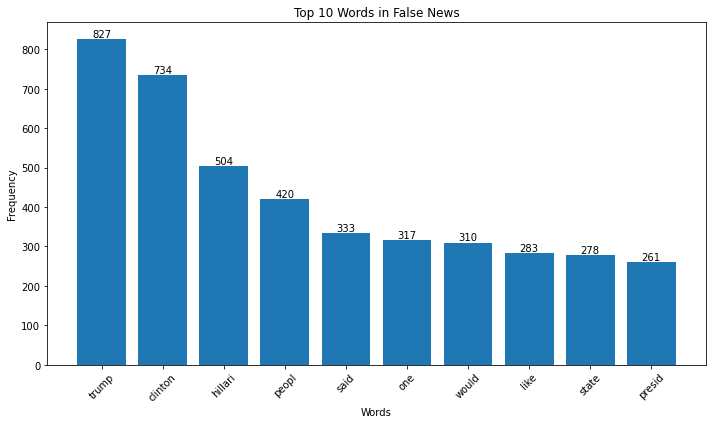

In [145]:
# Extract the top 10 words and their frequencies from the 'top' variable.
top_wordsfalse = [word[0] for word in topfalse]
frequencies = [freq[1] for freq in topfalse]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size for better visibility.
plt.bar(top_wordsfalse, frequencies)

# Add labels to the bars
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

# Set axis labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in False News')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability.
plt.tight_layout()  # Optional: Adjust the layout for better spacing.
plt.show()

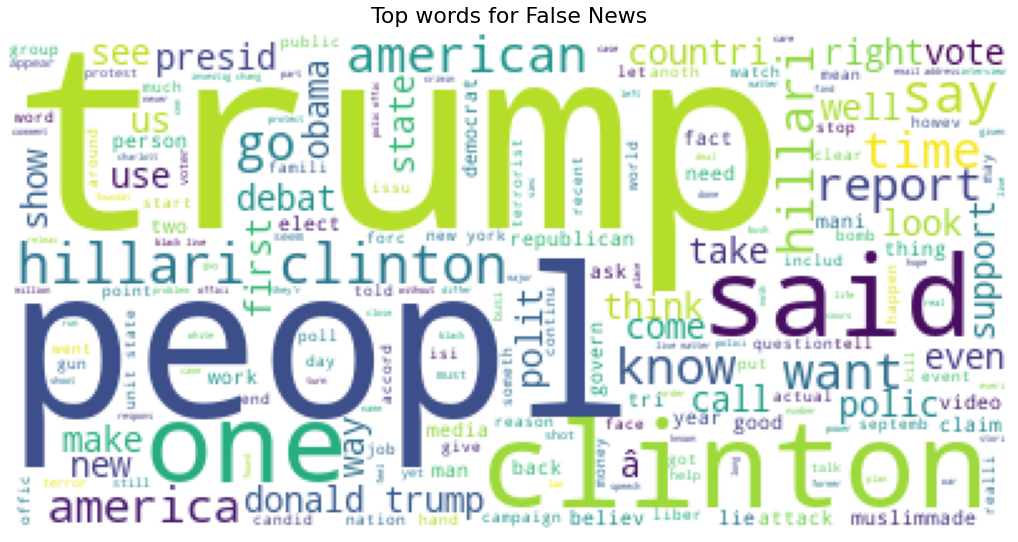

In [185]:
# Create a WordCloud object with specified parameters
wc = WordCloud(
    background_color='white',  # Set the background color to white
    max_words=200,             # Display a maximum of 200 words in the word cloud
)

# Generate the word cloud from the text of news labeled as "True"
wc.generate(' '.join(mainText for mainText in train_df.loc[train_df['Target'] == 0, 'clean_mainText']))

# Set up the plot to display the word cloud
plt.figure(figsize=(18, 10))  # Set the size of the figure for the word cloud visualization
plt.title('Top words for False News', fontdict={'size': 22, 'verticalalignment': 'bottom'})  # Set the title for the word cloud

# Display the word cloud image
plt.imshow(wc)

# Turn off the axis labels and ticks to remove the axes' border around the word cloud
plt.axis("off")

# Show the word cloud visualization
plt.show()


In [219]:
# Preprocessing the 'text' column in the test_df DataFrame by applying the preprocess_data function to each entry.
test_df['clean_tite'] = test_df['title'].apply(preprocess_data)

# Preprocessing the 'text' column in the train_df DataFrame by applying the preprocess_data function to each entry.
train_df['clean_title'] = train_df['title'].apply(preprocess_data)

# Displaying the first few rows of the train_df DataFrame, including the newly added 'clean_mainText' column.
train_df.head()

,author,mainText,orientation,title,veracity,portal,Target,artcicle_len,clean_mainText,clean_title
0,"By Tal Kopan and Manu Raju, CNN",Washington (CNN)A brewing civil war within the...,mainstream,Hill Republicans frustrated with GOP disunity ...,mostly true,cnn,1,658,washington cnna brew civil war within gop hous...,hill republican frustrat gop disun trump
1,Jonathan Constante,A Ukraine policewoman is dead after contractin...,right,Cop Dies From Tuberculosis After Suspect Spat ...,mostly true,right-wing-news,1,275,ukrain policewoman dead contract tuberculosi s...,cop die tuberculosi suspect spat
2,Tiffiny Ruegner,Now we find out that not only is Ahmad Rahami ...,right,New York bomb Suspect SUED Police!,mostly false,right-wing-news,0,348,find ahmad rahami terrorist murder he entitl w...,new york bomb suspect su polic
4,NaN,Donald Trump’s presidential campaign has paid ...,mainstream,Trump's campaign paid his businesses $8.2 million,mostly true,politico,1,1149,donald trump presidenti campaign paid famili b...,trump campaign paid busi million
5,Jeff Dunetz,"“We love you, buddy, but what are you here for...",right,MSNBC Destroys Hillary’s Campaign Manager Robb...,mostly true,eagle-rising,1,343,“we love buddi can't answer basic questions” c...,msnbc destroy hillari campaign manag robbi mook



### <span style="color:blue">2.2 Baseline Performance with RidgeClassifier </span>

Before running the baseline model, I will prepare the data for the text classification model by defining the features (X) and the target labels (y), and then splitting the data into training and testing sets:

In [223]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Extract preprocessed data as the feature 'X'
x = train_df['clean_mainText']

# Extract the target labels (0 for "False" News, 1 for "True" news) as 'y'
y = train_df['Target']

# Split the data into training and testing sets using train_test_split function
# 80% of the data will be used for training, and 20% for testing
# The random_state is set to 40 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Print the number of samples in the training set for X and y
print(len(x_train), len(y_train))

# Print the number of samples in the testing set for X and y
print(len(x_test), len(y_test))

1010 1010
253 253


I have decided to use the basic RidgeClassifier model as a baseline model. This classifier model uses the Ridge regression.
The RidgeClassifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case). 
This model offers regularization to prevent overfitting and is well-suited for handling high-dimensional and sparse text data.
Regularization strength (alpha) must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
 - References: 
              - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
              - Lectures on Ridge Regression, Wessel N.van Wieringen1,June 2023 https://arxiv.org/pdf/1509.09169.pdf
              
I have implemented the algorithm below.

In [224]:
# Import necessary libraries
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Create a pipeline consisting of two steps: CountVectorizer and RidgeClassifier
pipe = Pipeline([
    ('bow', CountVectorizer()),  # Convert text data into a numerical vector representation
    ('model', RidgeClassifier(alpha=1, fit_intercept=True, class_weight=None, solver='auto', random_state=None)),  
    # Use Ridge Classifier as the classification model with regularization alpha=1
    # The following parameters are listed with their default values:
    # alpha=1.0: Regularization strength, higher values specify stronger regularization.
    # fit_intercept=True: Specifies whether to calculate the intercept for this model.
    # normalize=False: If True, the regressors X will be normalized before regression.
    # class_weight=None: Weights associated with classes in the form {class_label: weight}.
    # solver='auto': Solver to use in the computational routines. Default 'auto' means automatic selection.
    # random_state=None: Controls the randomization of the algorithm. None means using the global random number generator.
])

# Fit the pipeline with the training data
pipe.fit(x_train, y_train)

# Make predictions on the training and testing data
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Print the accuracy of the model on the training and testing data
print('Train F1: {}'.format(metrics.f1_score(y_train, y_pred_train)))
print('Test  F1 : {}'.format(metrics.f1_score(y_test, y_pred_test)))


Train F1: 0.9974424552429668
Test  F1 : 0.845771144278607


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.40      0.41      0.40        51
           1       0.85      0.84      0.85       202

    accuracy                           0.75       253
   macro avg       0.62      0.63      0.62       253
weighted avg       0.76      0.75      0.76       253

Cross-Validation Scores:  [0.85213033 0.83709273 0.82631579 0.86772487 0.82989691]
Mean Cross-Validation Score:  0.8426321244118314


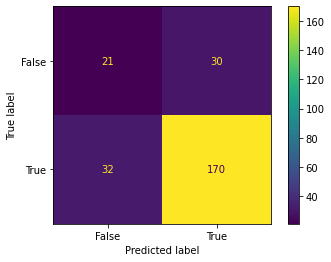

In [230]:
# Print other classification metrics for RidgeClassifier
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

# Perform cross-validation for Ridge Classifier (cv=5)
scores = cross_val_score(pipe, x, y, cv=5, scoring='f1')

# Print the cross-validation scores for RidgeClassifier
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", scores.mean())

# Calculate and display the confusion matrix for the test data for RidgeClassifier
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["False", "True"])
cm_display.plot()
plt.show()


In [232]:
# Import necessary libraries
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Create a pipeline consisting of two steps: CountVectorizer and PassiveAggressiveClassifier
pipe = Pipeline([
    ('bow', CountVectorizer()),  # Convert text data into a numerical vector representation
    ('model', PassiveAggressiveClassifier(C=1.0, fit_intercept=True, class_weight=None, early_stopping=False, loss='hinge', n_iter_no_change=5, shuffle=True, random_state=None, warm_start=False, verbose=0)),  
    # Use PassiveAggressiveClassifier as the classification model with regularization C=1.0
    # The following parameters are listed with their default values:
    # C=1.0: Regularization strength, higher values specify stronger regularization.
    # fit_intercept=True: Specifies whether to calculate the intercept for this model.
    # class_weight=None: Weights associated with classes in the form {class_label: weight}.
    # early_stopping=False: Whether to use early stopping to terminate training when validation score is not improving.
    # loss='hinge': The loss function. 'hinge' is the standard SVM loss.
    # n_iter_no_change=5: Number of iterations with no improvement to wait before early stopping.
    # shuffle=True: Whether or not the training data should be shuffled after each epoch.
    # random_state=None: Controls the randomization of the algorithm. None means using the global random number generator.
    # warm_start=False: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble.
    # verbose=0: The verbosity. Set to 1 to see progress during training.
])

# Fit the pipeline with the training data
pipe.fit(x_train, y_train)

# Make predictions on the training and testing data
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Print the accuracy of the model on the training and testing data
print('Train F1: {}'.format(metrics.f1_score(y_train, y_pred_train)))
print('Test  F1 : {}'.format(metrics.f1_score(y_test, y_pred_test)))



Train F1: 0.9955555555555555
Test  F1 : 0.8813559322033897


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        51
           1       0.86      0.90      0.88       202

    accuracy                           0.81       253
   macro avg       0.69      0.67      0.68       253
weighted avg       0.79      0.81      0.80       253

Cross-Validation Scores:  [0.86682809 0.86633663 0.84910486 0.91560102 0.86432161]
Mean Cross-Validation Score:  0.8724384422447157


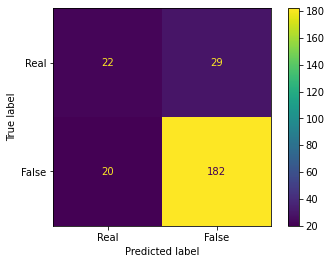

In [233]:
# Print other classification metrics for PassiveAggressiveClassifier
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

# Perform cross-validation for PassiveAggressiveClassifier (cv=5)
scores = cross_val_score(pipe, x, y, cv=5, scoring='f1')

# Print the cross-validation scores for PassiveAggressiveClassifier
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", scores.mean())

# Calculate and display the confusion matrix for the test data for RidgeClassifier
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Real", "False"])
cm_display.plot()
plt.show()

In [234]:
pipe = Pipeline([
    ('bow', CountVectorizer()),  # Convert text data into a numerical vector representation
    ('tfid', TfidfTransformer()),  # Apply Term Frequency-Inverse Document Frequency (TF-IDF) normalization
    ('model', RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=8,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        #min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        class_weight=None
    ))  
    
# RandomForestClassifier with all possible hyperparameters defined:
# n_estimators: The number of trees in the forest. Default is 100.
# criterion: The function to measure the quality of a split. Default is 'gini'.
# max_depth: The maximum depth of the tree. Default is None (expand until all leaves are pure).
# min_samples_split: The minimum number of samples required to split an internal node. Default is 2.
# min_samples_leaf: The minimum number of samples required to be at a leaf node. Default is 1.
# min_weight_fraction_leaf: The minimum weighted fraction of the total sum of weights (of all the input samples) required to be at a leaf node. Default is 0.0.
# max_features: The number of features to consider when looking for the best split. Default is 'auto'.
# max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Default is None.
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default is 0.0.
# bootstrap: Whether bootstrap samples are used when building trees. Default is True.
# oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy. Default is False.
# n_jobs: The number of jobs to run in parallel for both fit and predict. Default is None.
# random_state: Controls the randomness of the estimator. Default is None.
# verbose: Controls the verbosity when fitting and predicting. Default is 0.
# warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble. Default is False.
# class_weight: Weights associated with classes in the form {class_label: weight}. Default is None.
        
])


# Fit the pipeline with the training data
pipe.fit(x_train, y_train)

# Make predictions on the training and testing data
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# Print the accuracy of the model on the training and testing data
print('Train Accuracy: {}'.format(metrics.f1_score(y_train, y_pred_train)))
print('Test Accuracy: {}'.format(metrics.f1_score(y_test, y_pred_test)))


Train Accuracy: 0.9974457215836526
Test Accuracy: 0.8869179600886917


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        51
           1       0.80      0.99      0.89       202

    accuracy                           0.80       253
   macro avg       0.65      0.51      0.48       253
weighted avg       0.74      0.80      0.72       253

Cross-Validation Scores:  [0.87700535 0.88021534 0.87719298]
Mean Cross-Validation Score:  0.8781378910843177


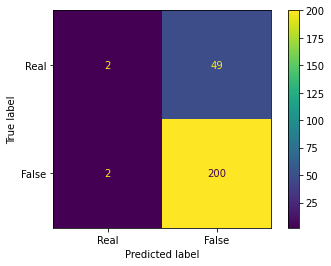

In [235]:

# Print other classification metrics RandomForestClassifier
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

# Perform cross-validation RandomForestClassifier
scores = cross_val_score(pipe, x, y, cv=3, scoring='f1')

# Print the cross-validation scores RandomForestClassifier
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", scores.mean())

# Calculate and display the confusion matrix for the test data
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Real", "False"])
cm_display.plot()
plt.show()